# Training Notebook

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
# import libraries
from sklearn.metrics import classification_report
import numpy as np
import gc
import tensorflow as tf
from tensorflow import keras
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [3]:
# Loading Data
X_train_full = np.load('train_data.npy')
t_train_full = np.load('train_labels.npy')

print(X_train_full.shape, t_train_full.shape)

(150528, 29994) (29994,)


In [4]:
X_train_full.dtype, t_train_full.dtype

(dtype('uint8'), dtype('uint8'))

In [30]:
labels_names = ['Disapproval','Angry','Fear','Happy','Sad','Surprised', 'Neutral']

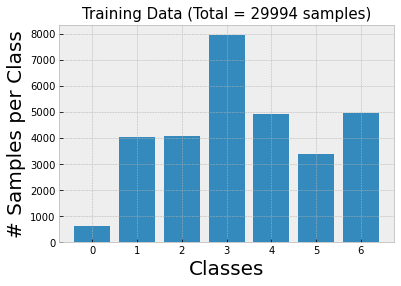

In [6]:
# Counting number samples per class
vals, counts = np.unique(t_train_full, return_counts=True)

plt.bar(vals, counts)
plt.xticks(range(7),range(7))
plt.xlabel('Classes',size=20)
plt.ylabel('# Samples per Class', size=20)
plt.title('Training Data (Total = '+str(X_train_full.shape[1])+' samples)',size=15);

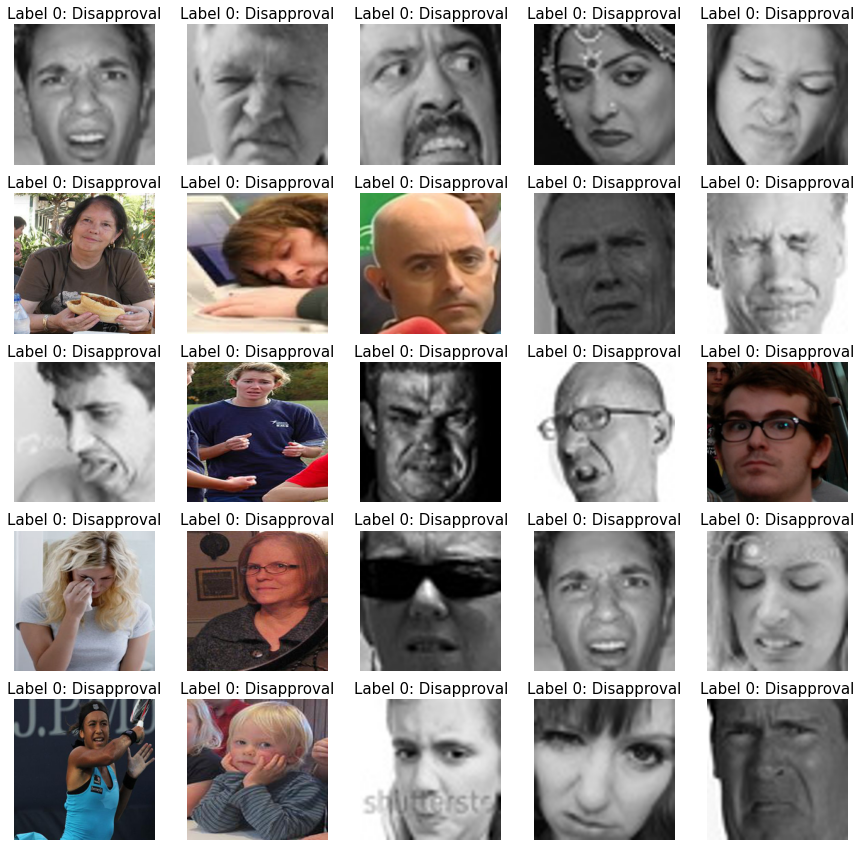

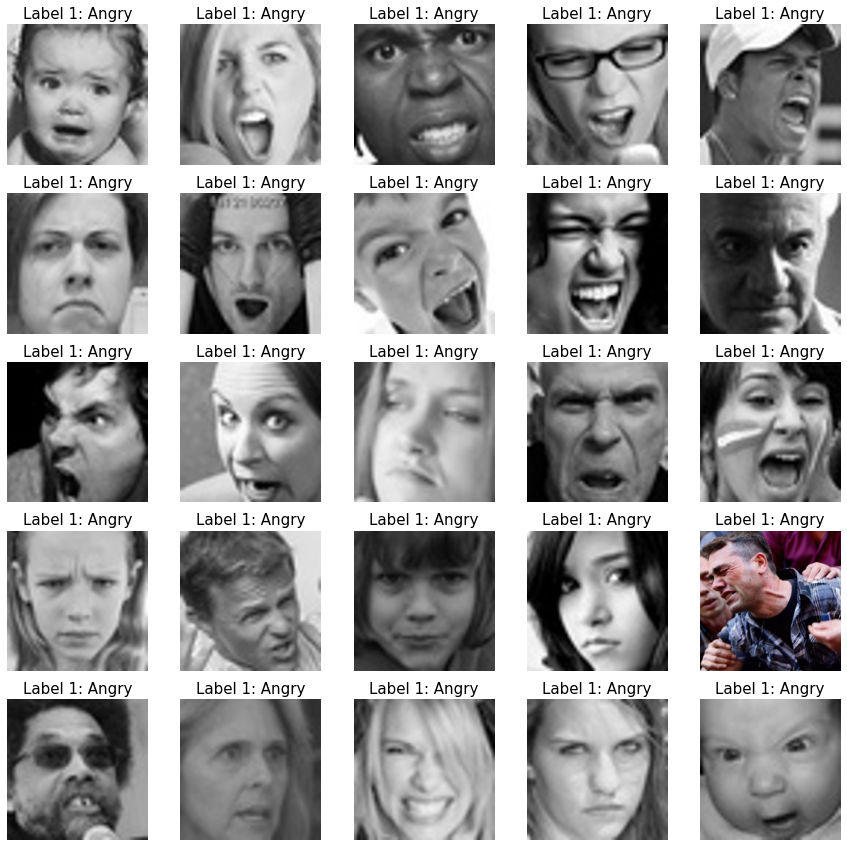

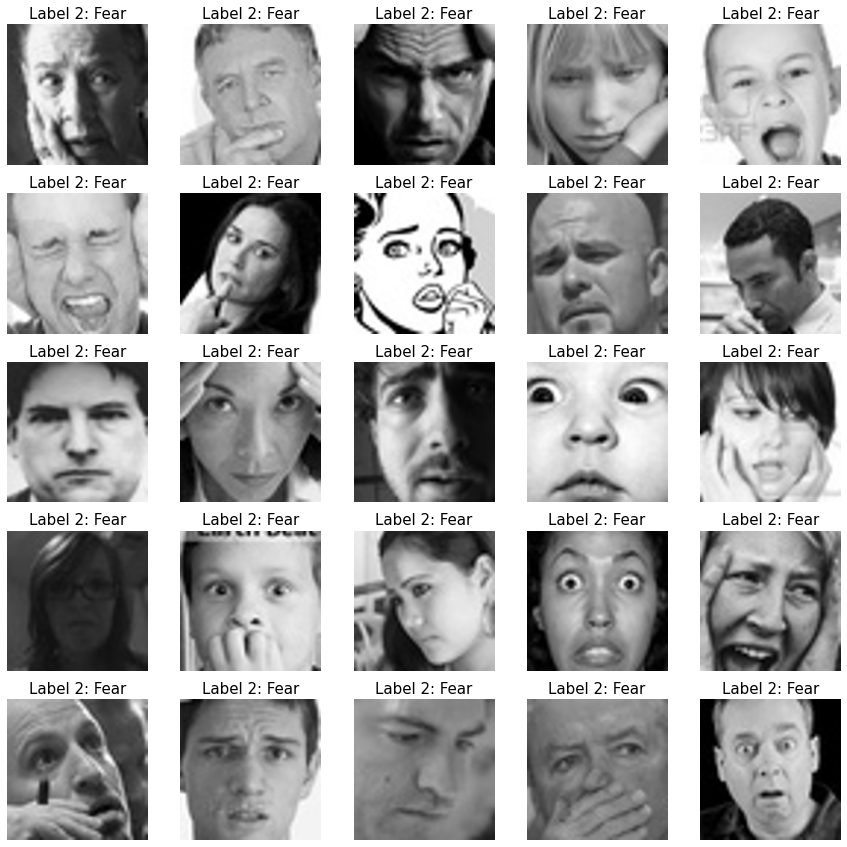

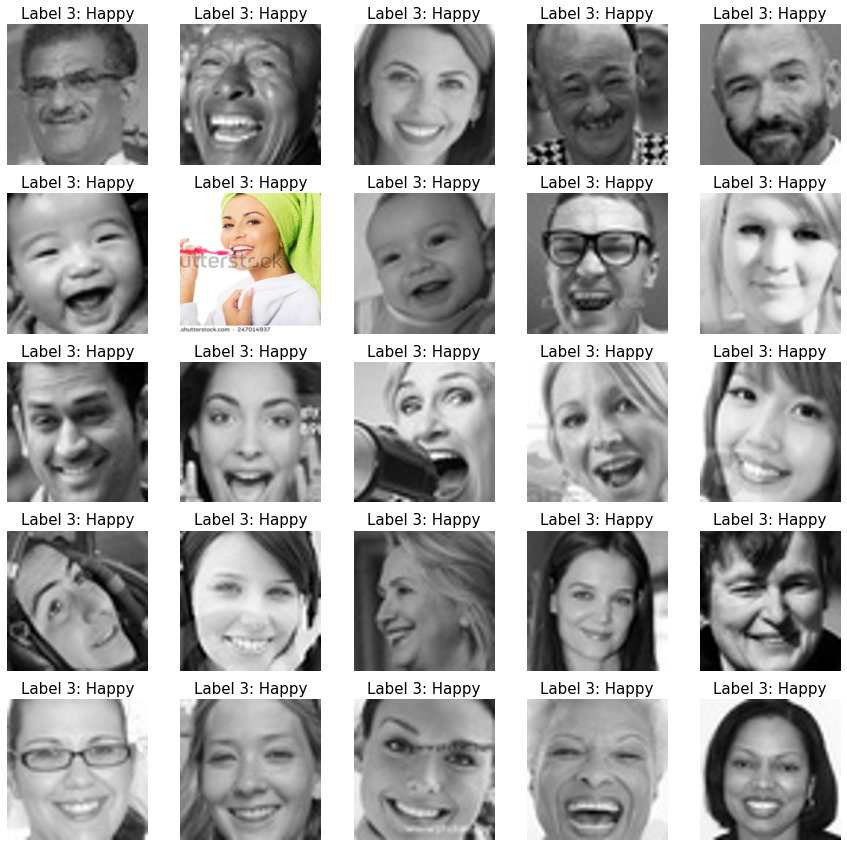

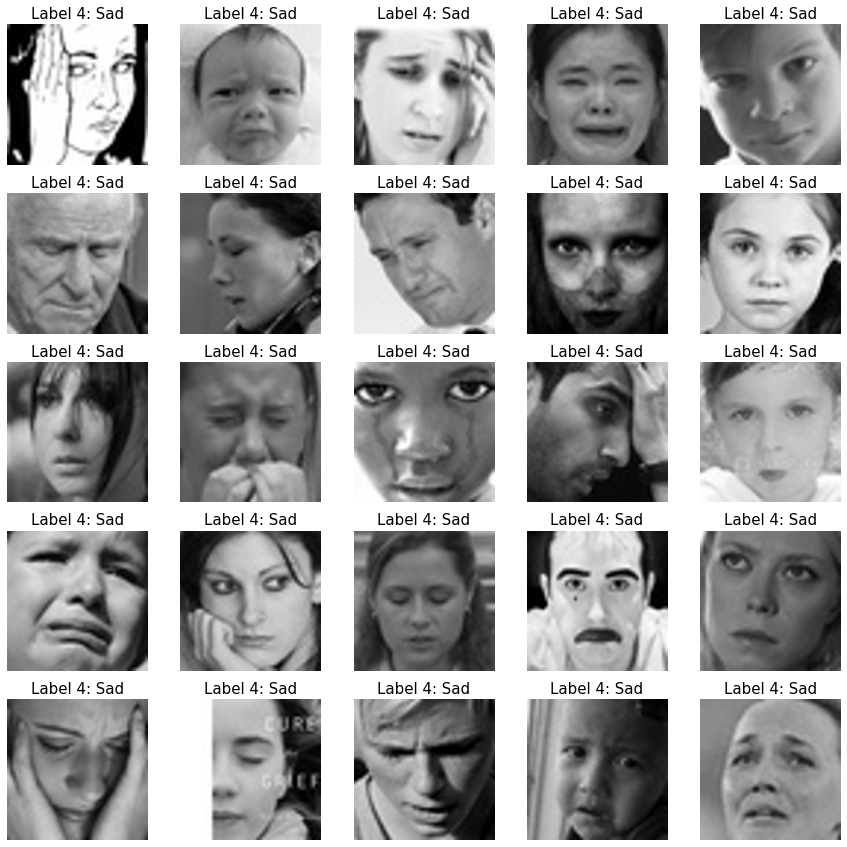

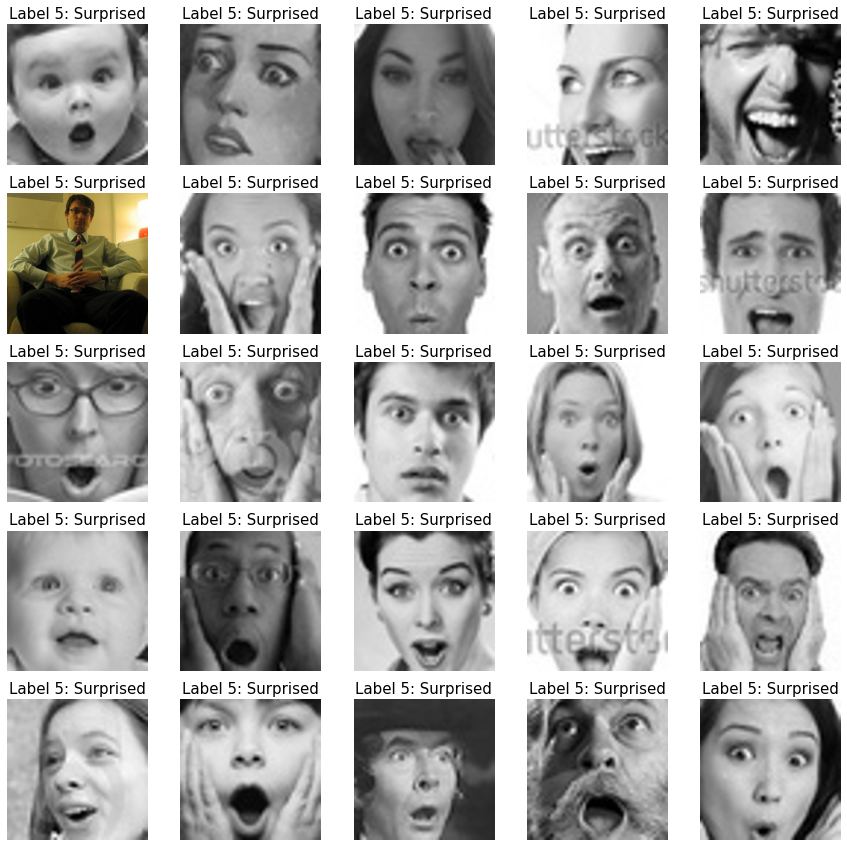

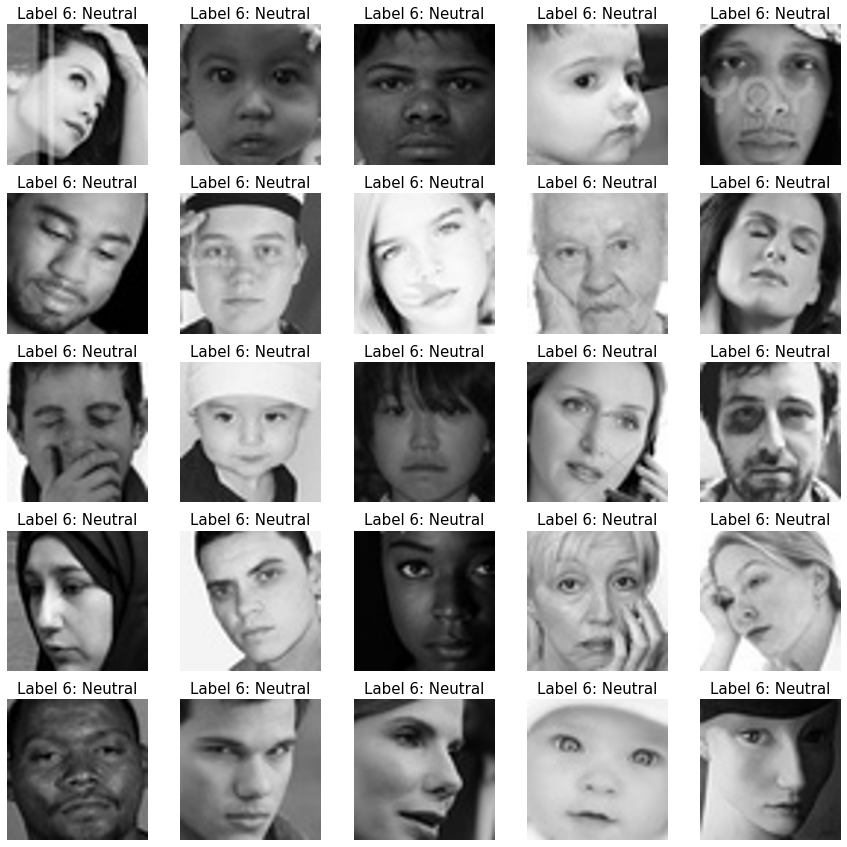

In [7]:
for i in range(0,7):
    rnd_sample = npr.permutation(np.where(t_train_full==i)[0])
    fig=plt.figure(figsize=(15,15))
    for j in range(25):
        fig.add_subplot(5,5,j+1)
        plt.imshow(X_train_full[:,rnd_sample[j]].reshape((224,224,3)))
        label_idx = int(t_train_full[rnd_sample[j]])
        plt.axis('off');plt.title('Label '+str(label_idx)+': '+labels_names[label_idx],size=15)
    plt.show()
    print('\n\n')

### Split data into training and validation sets

In [8]:
from sklearn.model_selection import train_test_split

X_train_full = X_train_full.T


# Train and validation sets
X_train, X_val, t_train, t_val = train_test_split(X_train_full, 
                                                  t_train_full, 
                                                  shuffle=True,
                                                  stratify=t_train_full,
                                                  random_state=0,
                                                  test_size=0.2)

X_train.shape, X_val.shape, t_train.shape, t_val.shape

((23995, 150528), (5999, 150528), (23995,), (5999,))

In [9]:
del X_train_full
gc.collect()

61955

In [10]:
del t_train_full
gc.collect()

0

### Preprocess data

In [12]:
X_train = X_train.reshape(X_train.shape[0], 224, 224, 3)/255.0
X_val = X_val.reshape(X_val.shape[0], 224, 224, 3)/255.0
print(X_train.shape, X_val.shape)
print(X_train.dtype, X_val.dtype)

(23995, 224, 224, 3) (5999, 224, 224, 3)
float64 float64


In [12]:
# Function takes in dataset and returns it preprocessed for the model
#def preprocess_mobilenetv2(dataset):
#    return keras.applications.mobilenet_v2.preprocess_input(dataset).astype('uint8')

In [ ]:
#X_train = preprocess_mobilenetv2(X_train)
#X_val = preprocess_mobilenetv2(X_val)

In [17]:
# Load base model with 'imagenet' as the weights
base_model = keras.applications.MobileNetV2(weights='imagenet',
                                           input_shape=(224,224,3),
                                           include_top=False)
# Make all layers of pre-trained model untrainable
base_model.trainable = True

In [24]:
inputs = keras.Input(shape=(224,224,3))
x = keras.Sequential([keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
                     keras.layers.experimental.preprocessing.RandomRotation(0.2)])(inputs)
x = keras.applications.mobilenet_v2.preprocess_input(x)
x = base_model(x)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(7, activation='softmax', 
                             kernel_regularizer=keras.regularizers.l2(1e-2))(x)

model = keras.Model(inputs, outputs=outputs)
#,beta_1=0.9, beta_2=0.999
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
             optimizer=keras.optimizers.Adam(learning_rate=1e-7),
             metrics=['accuracy'])


In [25]:
history = model.fit(X_train, t_train, batch_size=32, epochs=50, 
                    validation_data=(X_val, t_val),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/50
750/750 [==============================] - 98s 127ms/step - loss: 1.9973 - accuracy: 0.2828 - val_loss: 2.2106 - val_accuracy: 0.1324
Epoch 2/50
750/750 [==============================] - 93s 123ms/step - loss: 1.9395 - accuracy: 0.3217 - val_loss: 1.9381 - val_accuracy: 0.3694
Epoch 3/50
750/750 [==============================] - 92s 122ms/step - loss: 1.8906 - accuracy: 0.3566 - val_loss: 1.8606 - val_accuracy: 0.4111
Epoch 4/50
750/750 [==============================] - 93s 124ms/step - loss: 1.8368 - accuracy: 0.3925 - val_loss: 1.8157 - val_accuracy: 0.4267
Epoch 5/50
750/750 [==============================] - 92s 122ms/step - loss: 1.7909 - accuracy: 0.4183 - val_loss: 1.7762 - val_accuracy: 0.4386
Epoch 6/50
750/750 [==============================] - 92s 122ms/step - loss: 1.7443 - accuracy: 0.4401 - val_loss: 1.7372 - val_accuracy: 0.4534
Epoch 7/50
750/750 [==============================] - 93s 123ms/step - loss: 1.7065 - accuracy: 0.4612 - val_loss: 1.6986 - val_ac

In [26]:
history = model.fit(X_train, t_train, batch_size=32, epochs=80, 
                    validation_data=(X_val, t_val),
                    callbacks=[keras.callbacks.EarlyStopping(patience=15)])

Epoch 1/80
750/750 [==============================] - 97s 129ms/step - loss: 0.9507 - accuracy: 0.7325 - val_loss: 1.1077 - val_accuracy: 0.6614
Epoch 2/80
750/750 [==============================] - 92s 123ms/step - loss: 0.9504 - accuracy: 0.7308 - val_loss: 1.1052 - val_accuracy: 0.6624
Epoch 3/80
750/750 [==============================] - 93s 123ms/step - loss: 0.9445 - accuracy: 0.7334 - val_loss: 1.1026 - val_accuracy: 0.6626
Epoch 4/80
750/750 [==============================] - 92s 123ms/step - loss: 0.9328 - accuracy: 0.7375 - val_loss: 1.1006 - val_accuracy: 0.6629
Epoch 5/80
750/750 [==============================] - 92s 123ms/step - loss: 0.9347 - accuracy: 0.7362 - val_loss: 1.0984 - val_accuracy: 0.6629
Epoch 6/80
750/750 [==============================] - 92s 122ms/step - loss: 0.9308 - accuracy: 0.7357 - val_loss: 1.0964 - val_accuracy: 0.6626
Epoch 7/80
750/750 [==============================] - 92s 123ms/step - loss: 0.9227 - accuracy: 0.7392 - val_loss: 1.0946 - val_ac

In [27]:
model.evaluate(X_train,t_train)
model.evaluate(X_val, t_val)

188/188 [==============================] - 2s 11ms/step - loss: 1.0773 - accuracy: 0.6689


[1.077290415763855, 0.6689448356628418]

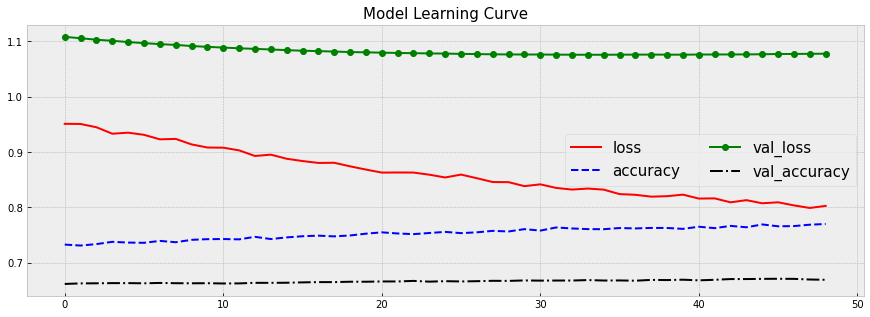

In [28]:
key_names = list(history.history.keys())
colors = ['-r', '--b', '-og', '-.k']
plt.figure(figsize=(15,5))
for i in range(len(key_names)):
    plt.plot(history.history[key_names[i]], colors[i], label=key_names[i])
plt.legend(fontsize=15, ncol=2)
plt.title('Model Learning Curve', size=15);    

In [31]:
y_train = np.argmax(model.predict(X_train), axis=1)
print(classification_report(t_train, y_train, target_names=labels_names))

              precision    recall  f1-score   support

 Disapproval       0.96      0.53      0.68       504
       Angry       0.83      0.82      0.83      3236
        Fear       0.82      0.73      0.77      3277
       Happy       0.93      0.95      0.94      6361
         Sad       0.78      0.82      0.80      3933
   Surprised       0.90      0.88      0.89      2723
     Neutral       0.80      0.88      0.84      3961

    accuracy                           0.85     23995
   macro avg       0.86      0.80      0.82     23995
weighted avg       0.85      0.85      0.85     23995



In [32]:
y_val = np.argmax(model.predict(X_val), axis=1)
print(classification_report(t_val, y_val, target_names=labels_names))

              precision    recall  f1-score   support

 Disapproval       0.58      0.23      0.33       126
       Angry       0.60      0.57      0.58       809
        Fear       0.56      0.48      0.52       819
       Happy       0.85      0.87      0.86      1591
         Sad       0.54      0.55      0.55       983
   Surprised       0.78      0.72      0.75       681
     Neutral       0.59      0.71      0.65       990

    accuracy                           0.67      5999
   macro avg       0.64      0.59      0.60      5999
weighted avg       0.67      0.67      0.67      5999



### Create tensorflow lite model

In [33]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('models/model.tflite', 'wb') as f:
  f.write(tflite_model)

2023-09-06 23:32:55.461848: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2023-09-06 23:33:03.698190: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 2
2023-09-06 23:33:03.699353: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2023-09-06 23:33:03.718171: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78911 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:07:00.0, compute capability: 8.0
2023-09-06 23:33:03.720850: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 78911 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:0f:00.0, compute capability: 8.0
2023-09-06 23:33:03.732529: I tensorflow/core/gra

In [34]:
# Save the model as h5 file
model.save('models/model.h5')

/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


#### Apply model to test data

In [35]:
# Loading Test Data
X_test_full = np.load('test_data.npy')
t_test_full = np.load('test_labels.npy')

print(X_test_full.shape, t_test_full.shape)

(150528, 7598) (7598,)


In [37]:
X_test_full.dtype, t_test_full.dtype

(dtype('uint8'), dtype('uint8'))

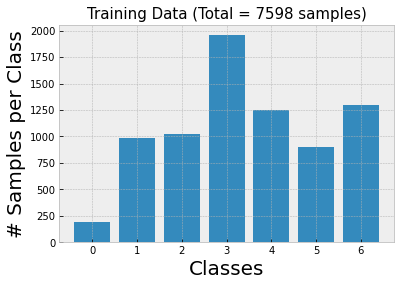

In [38]:
# Counting number samples per class
vals, counts = np.unique(t_test_full, return_counts=True)

plt.bar(vals, counts)
plt.xticks(range(7),range(7))
plt.xlabel('Classes',size=20)
plt.ylabel('# Samples per Class', size=20)
plt.title('Training Data (Total = '+str(X_test_full.shape[1])+' samples)',size=15);

In [40]:
# Preprocess
X_test_full = X_test_full.T
X_test_full = X_test_full.reshape(X_test_full.shape[0], 224, 224, 3)/255.0
print(X_test_full.dtype)

float64


In [41]:
model.evaluate(X_test_full,t_test_full)

238/238 [==============================] - 3s 12ms/step - loss: 1.1411 - accuracy: 0.6553


[1.1411080360412598, 0.6553040146827698]

In [42]:
y_test = np.argmax(model.predict(X_test_full), axis=1)
print(classification_report(t_test_full, y_test, target_names=labels_names))

              precision    recall  f1-score   support

 Disapproval       0.70      0.22      0.34       189
       Angry       0.57      0.58      0.58       984
        Fear       0.53      0.45      0.49      1026
       Happy       0.82      0.87      0.84      1957
         Sad       0.54      0.57      0.55      1252
   Surprised       0.77      0.72      0.74       897
     Neutral       0.59      0.64      0.62      1293

    accuracy                           0.66      7598
   macro avg       0.65      0.58      0.59      7598
weighted avg       0.65      0.66      0.65      7598

